In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('StudentsPerformance.csv')

In [27]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
print("Cateogories in 'gender' variable : ", end=" ")
print(df['gender'].unique())

print("Cateogories in 'race/ethnicity ' variable : ", end=" ")
print(df['race/ethnicity'].unique())

print("Cateogories in 'parental level of education' variable : ", end=" ")
print(df['parental level of education'].unique())

print("Cateogories in 'lunch ' variable : ", end=" ")
print(df['lunch'].unique())

print("Cateogories in 'test preparation course' variable : ", end=" ")
print(df['test preparation course'].unique())


Cateogories in 'gender' variable :  ['female' 'male']
Cateogories in 'race/ethnicity ' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Cateogories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Cateogories in 'lunch ' variable :  ['standard' 'free/reduced']
Cateogories in 'test preparation course' variable :  ['none' 'completed']


In [34]:
#define numerical and categorical features
num_features = [feature for feature in df.columns if df[feature].dtype !="O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(num_features),num_features))
print("We have {} categorical features : {}".format(len(cat_features),cat_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [35]:
# Adding columns for "Total Score " and "Average Score"
df["total score"] = df["math score"]+df["reading score"]+ df["writing score"]
df["average score"] = df["total score"]//3

In [36]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [37]:
reading_full = df[df['reading score']==100]['average score'].count()
writing_full = df[df["writing score"]==100]['average score'].count()
math_full = df[df["math score"]==100]["average score"].count()

print(f'Number of student with full marks in maths : {math_full}')
print(f'Number of student with full marks in writing score : {writing_full}')
print(f'Number of student with full marks in reading score : {reading_full}')

Number of student with full marks in maths : 7
Number of student with full marks in writing score : 14
Number of student with full marks in reading score : 17


In [38]:
reading_less_20 = df[df['reading score']<20]['average score'].count()
writing_less_20 = df[df["writing score"]<20]['average score'].count()
math_less_20= df[df["math score"]<20]["average score"].count()

print(f'Number of student with less than 20 marks in writing score : {writing_less_20}')
print(f'Number of student with less than 20 marks in reading score : {reading_less_20}')
print(f'Number of student with less than 20 marks in writing score : {math_less_20}')


Number of student with less than 20 marks in writing score : 3
Number of student with less than 20 marks in reading score : 1
Number of student with less than 20 marks in writing score : 4


HISTOGRAM AND KDE

<Axes: xlabel='average score', ylabel='Count'>

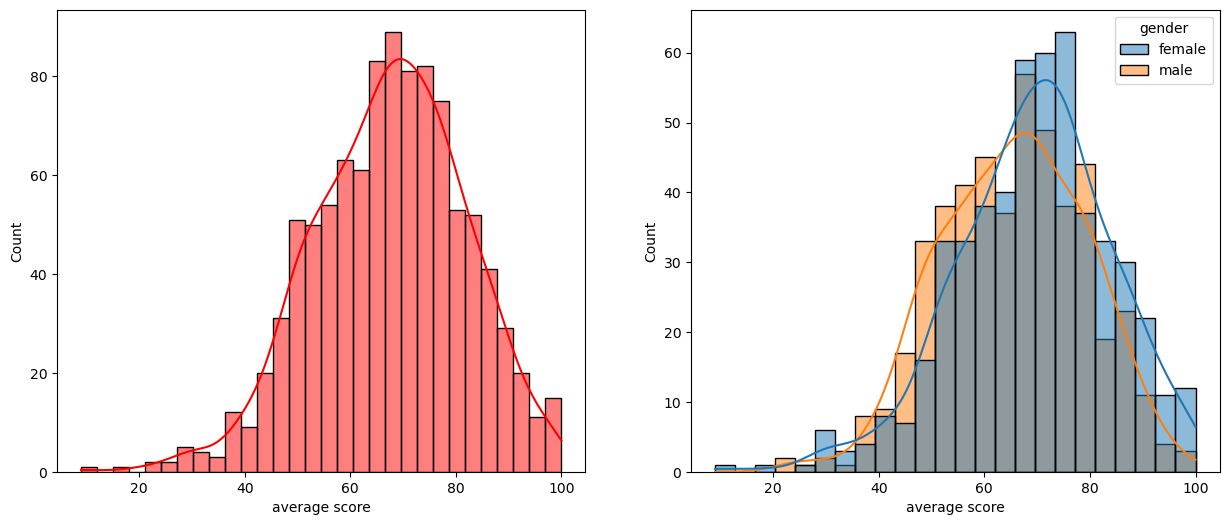

In [39]:
fig,axs = plt.subplots(1,2,figsize = (15,6))
plt.subplot(121)
sns.histplot(data = df, x='average score',bins = 30,kde=True,color='r')

plt.subplot(122)
sns.histplot(data = df, x="average score",kde=True,hue="gender")

<Axes: xlabel='total score', ylabel='Count'>

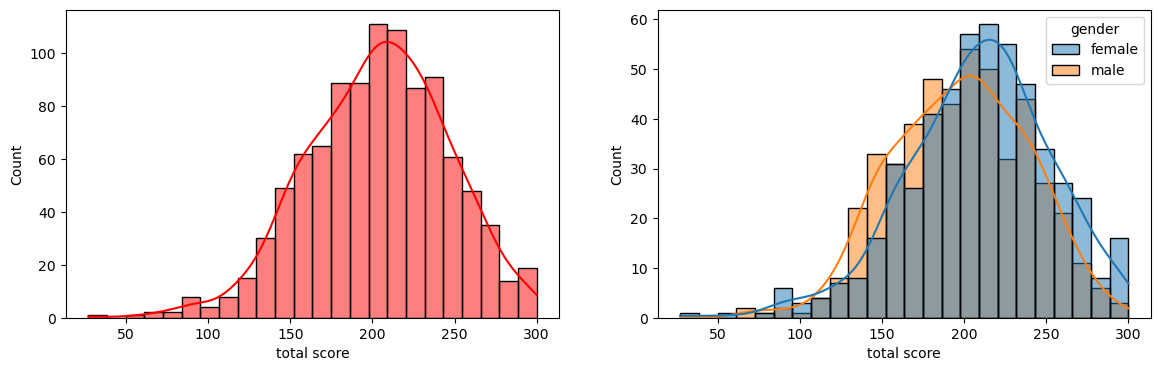

In [40]:
fig, axs = plt.subplots(1,2,figsize = (14,4))
plt.subplot(121)
sns.histplot(data = df,x="total score",kde=True,color="r")
plt.subplot(122)
sns.histplot(data = df,x='total score',kde=True, hue='gender')



<Axes: xlabel='average score', ylabel='Count'>

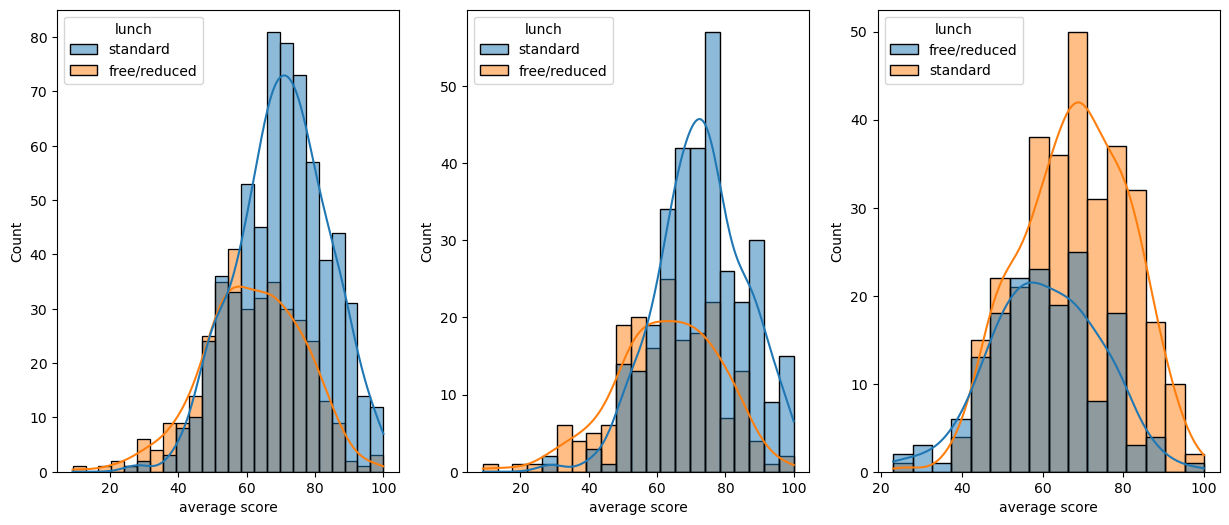

In [41]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=="female"],x='average score',kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'],x ='average score',kde=True, hue='lunch')

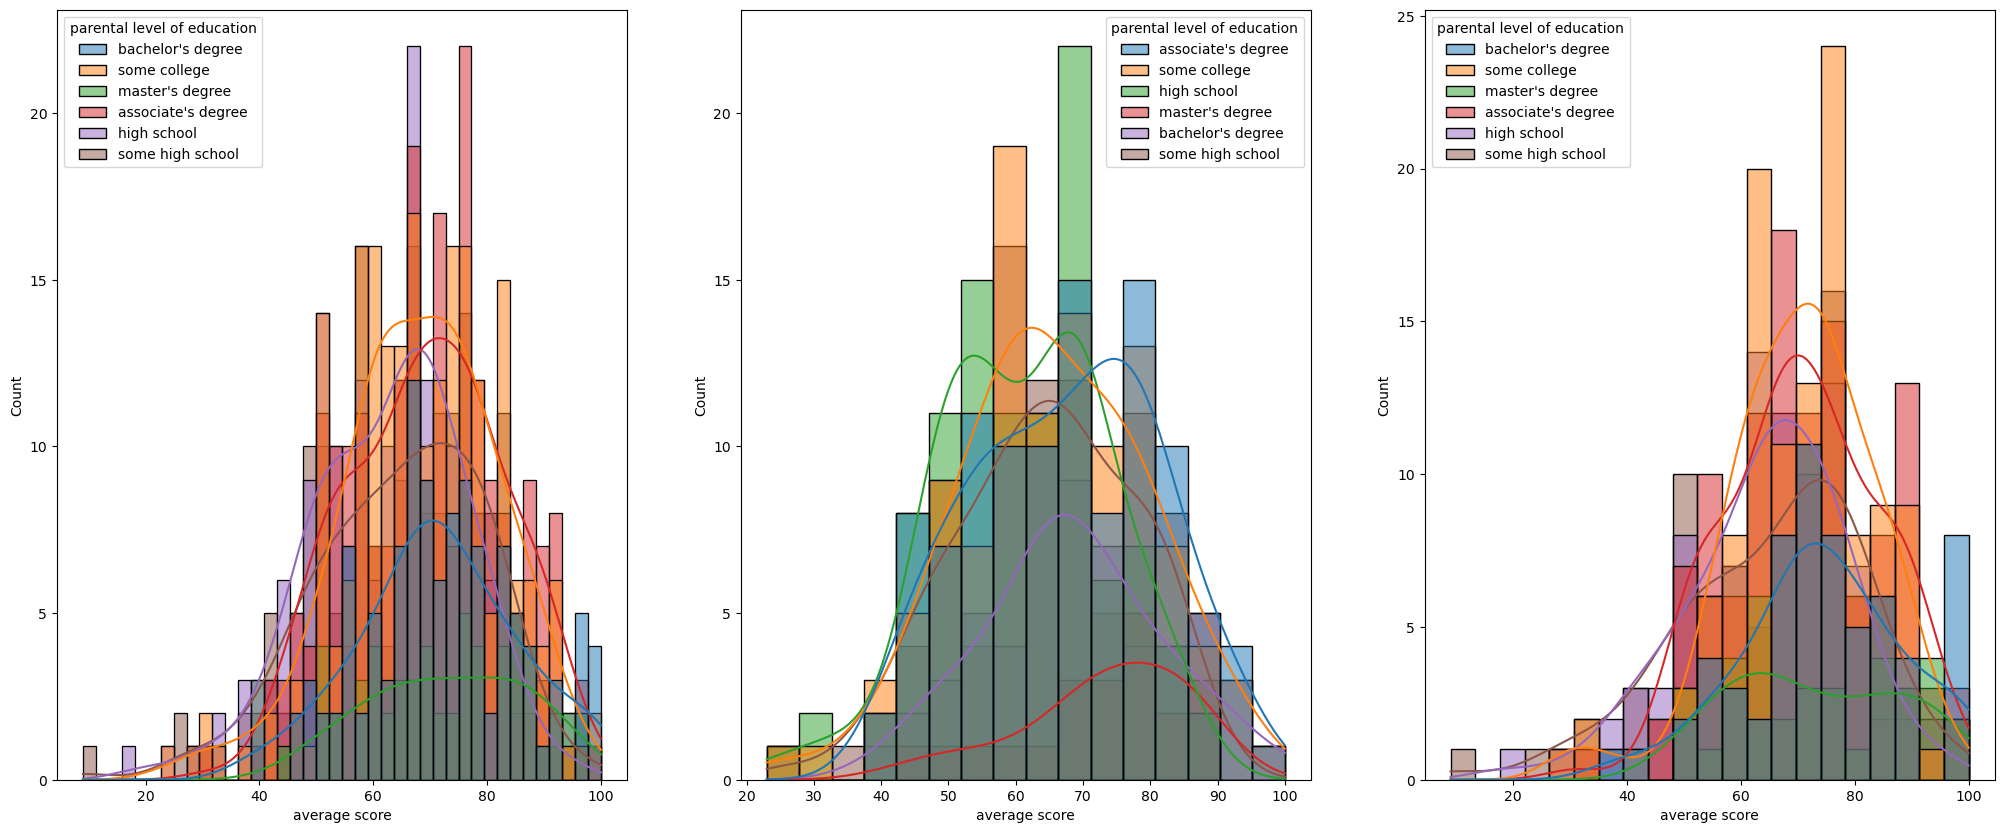

In [42]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score', bins=40,kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

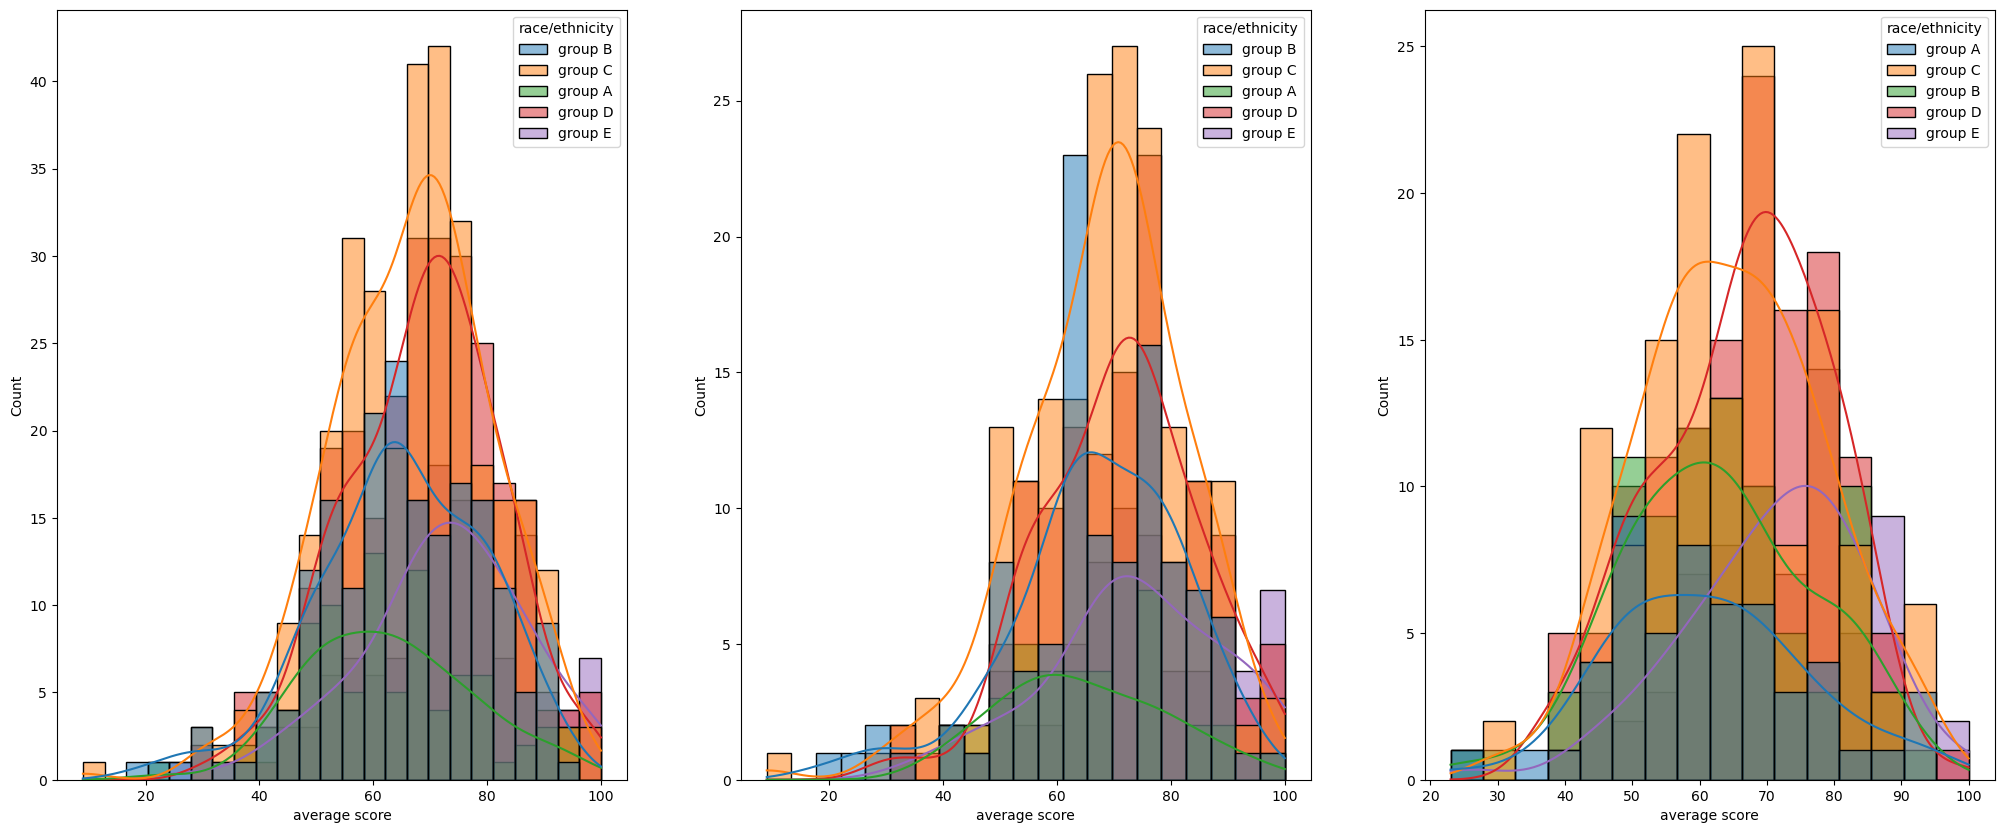

In [43]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

 Maximumum score of students in all three subjects

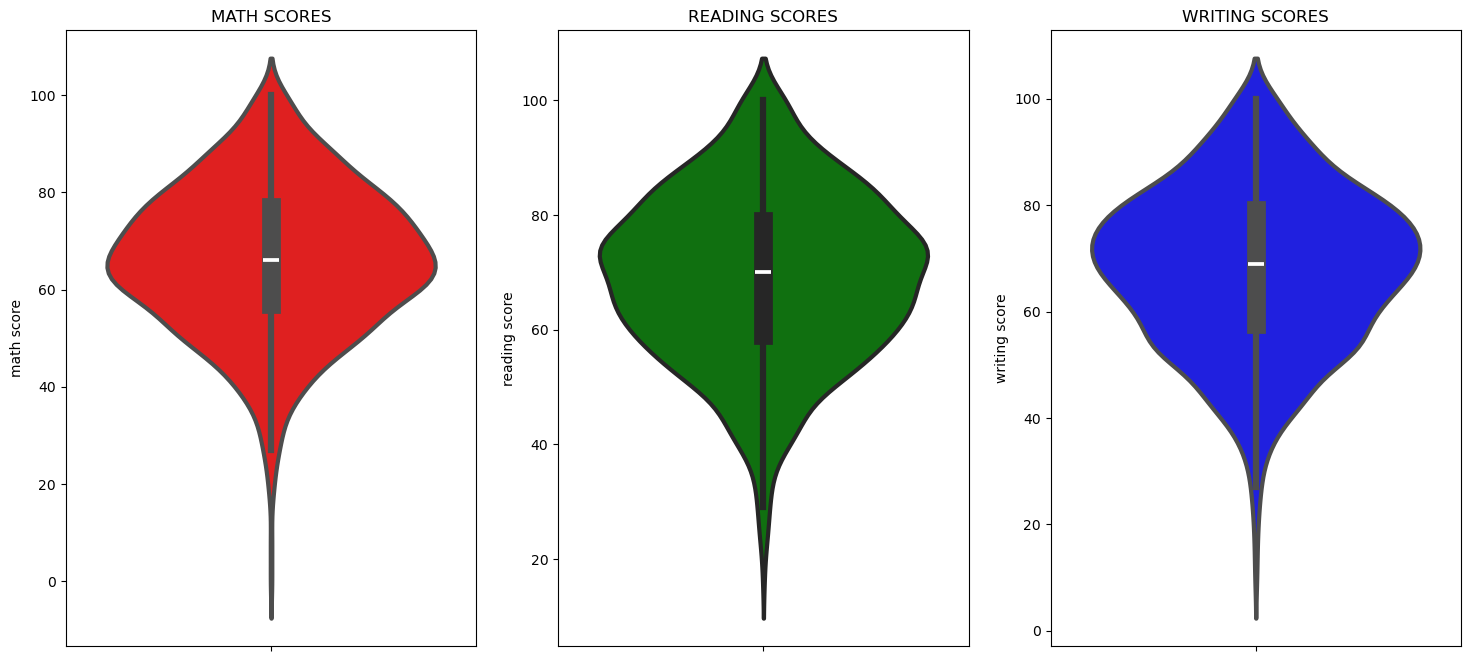

In [44]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Multivariate analysis using pieplot

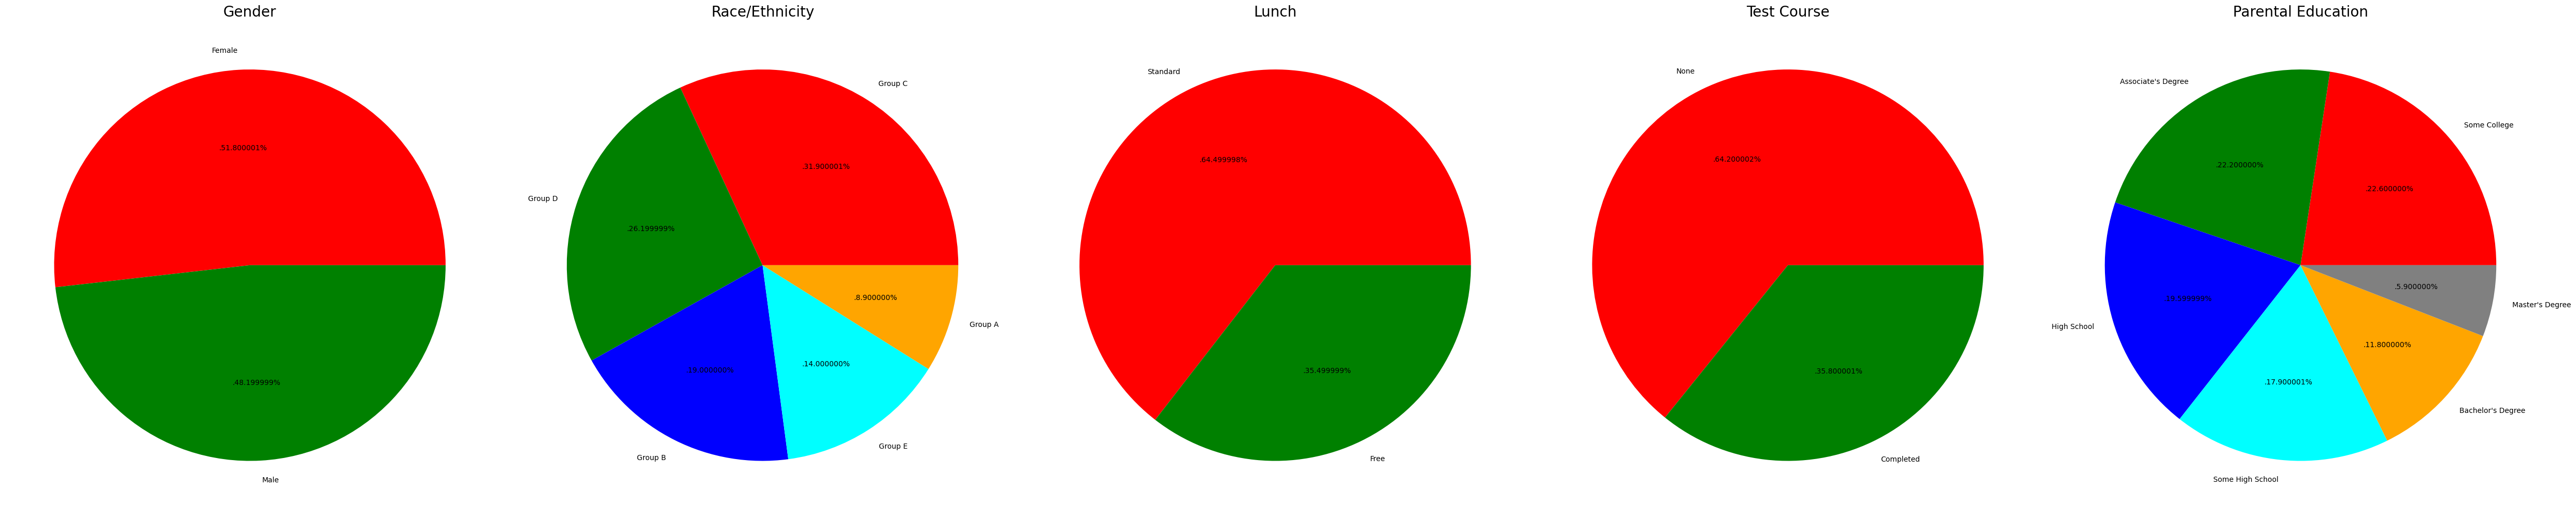

In [45]:
plt.rcParams['figure.figsize'] = (50, 30)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Feature Wise Visualization


 GENDER COLUMN


How is distribution of Gender ?
Is gender has any impact on student's performance ?



UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

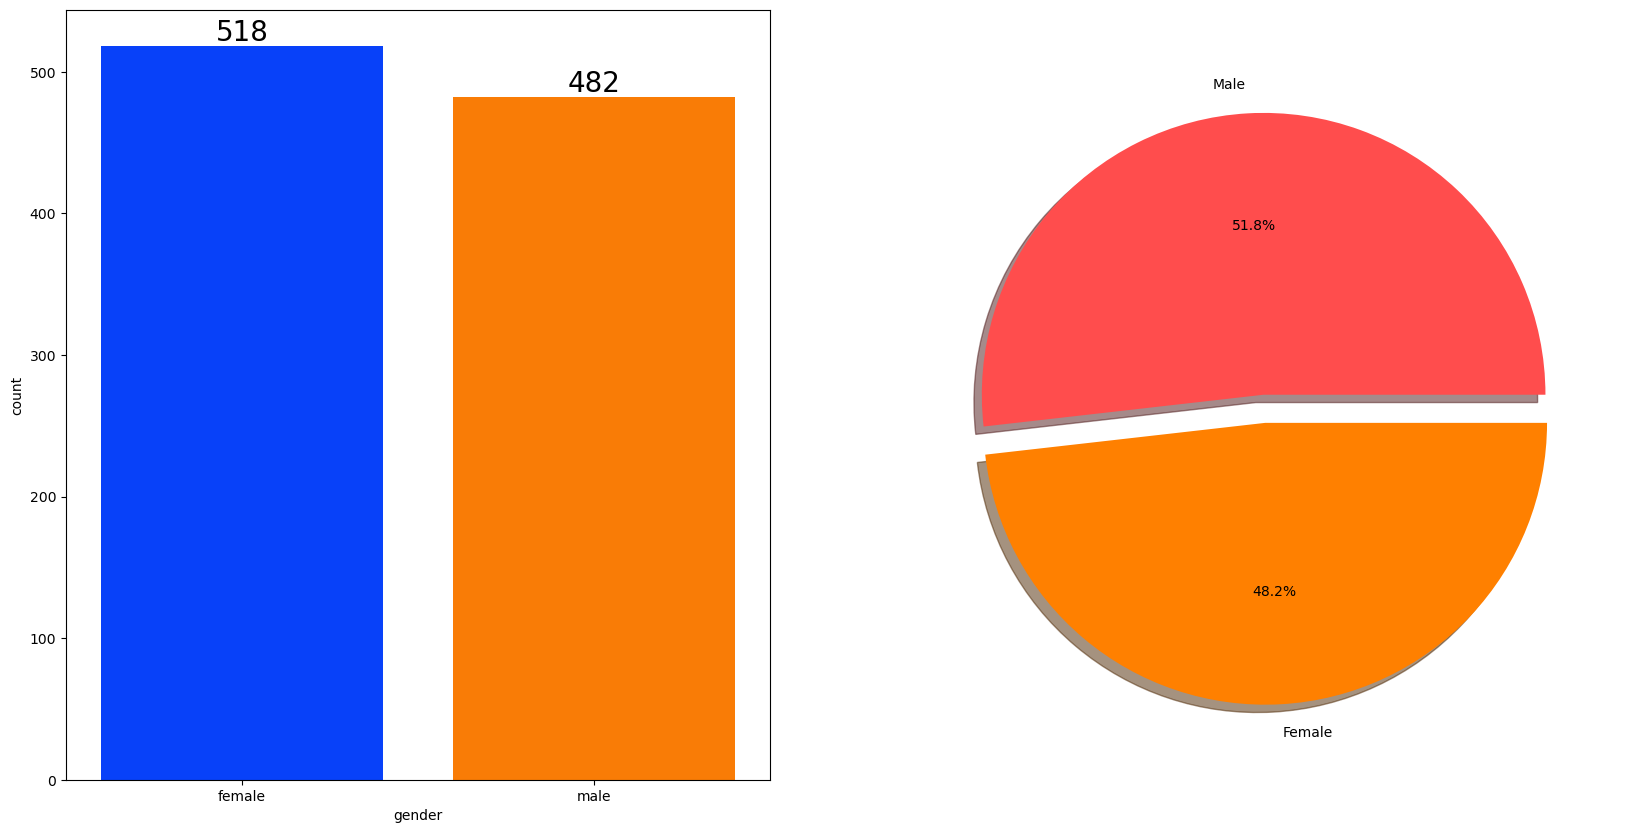

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [47]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]

In [83]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

NameError: name 'gender_group' is not defined

<Figure size 1000x800 with 0 Axes>